In [1]:
import numpy as np
import mnist
from tqdm.notebook import tqdm

In [2]:
def relu(x):
    return np.maximum(0, x)

In [3]:
data = mnist.load_mnist(flatten = True, one_hot_label=True)

In [4]:
training_idx = 0
test_idx = 1
image_idx = 0
label_idx = 1

In [5]:
import matplotlib.pyplot as plt

In [6]:
inputData = data[training_idx][image_idx]
labelData = data[training_idx][label_idx]

In [7]:
# class

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    # np.exp(-x) が大きくなりすぎるとエラーが出るため、クリッピング対策
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    # シグモイドの微分は s * (1 - s) で計算できる
    s = sigmoid(x)
    return s * (1 - s)

## ここではsigmoid関数を活性化関数として用いているため初期値には # ザビエルの初期値

class NN:
    def __init__(self, inputDataSize):
        self.weight1 = np.random.rand(inputDataSize, 16) / np.sqrt(inputDataSize) # ザビエルの初期値
        self.bias1 = np.random.rand(16, )
        
        # len(layer1) = 16
        self.weight2 = np.random.rand(16, 16) / np.sqrt(16) # ザビエルの初期値
        self.bias2 = np.random.rand(16, )
        # len(layer2) = 16
        self.weight3 = np.random.rand(16, 10) / np.sqrt(16) # ザビエルの初期値
        self.bias3 = np.random.rand(10, )

    def forward(self, inputData):
        self.inputData = inputData
        self.z1 = np.dot(inputData, self.weight1) + self.bias1
        self.z1_s = sigmoid(self.z1)

        self.z2 = np.dot(self.z1, self.weight2) + self.bias2
        self.z2_s = sigmoid(self.z2)

        self.z3 = np.dot(self.z2, self.weight3) + self.bias3
        
        self.output = sigmoid(self.z3)
        # ReLUだと誤差逆伝播法でウェイトの値が爆発しちゃうのでシグモイド関数で抑え込んだ。
        return self.output

    def backward(self, meandiff, learning_rate=0.01):
        delta3 = 2 * meandiff * sigmoid_derivative(self.z3)
        # print("delta3", delta3)
        z2 = sigmoid_derivative(self.z2.reshape(1, -1))
        delta3 = delta3.reshape(1, -1)
        z1 = sigmoid_derivative(self.z1.reshape(1, -1))
        inputData = self.inputData.reshape(1, -1)
        
        dW3 = np.dot(z2.T, delta3)
        # print("dW3", dW3)
        db3 = np.sum(delta3, axis=0)
        # print("db3", db3)

        delta2 = np.dot(delta3, self.weight3.T)
        # print("delta2", delta2)
        dW2 = np.dot(z1.T, delta2)
        # print("dW2", dW2)
        db2 = np.sum(delta2, axis=0)
        # print("db2", db2)

        delta1 = np.dot(delta2, self.weight2.T)
        # print("delta1", delta1)
        dW1 = np.dot(inputData.T, delta1)
        # print("dW1", dW1)
        db1 = np.sum(delta1, axis=0)
        # print("db1", db1)

        # パラメータの更新
        self.weight3 -= learning_rate * dW3
        # print("weight3", self.weight3)
        self.bias3   -= learning_rate * db3
        # print("bias3", self.bias3)
        self.weight2 -= learning_rate * dW2
        # print("weight2", self.weight2)
        self.bias2   -= learning_rate * db2
        # print("bias2", self.bias2)
        self.weight1 -= learning_rate * dW1
        # print("weight1", self.weight1)
        self.bias1   -= learning_rate * db1
        # print("bias1", self.bias1)

In [8]:
result = np.random.choice(list(range(len(inputData))), size=100, replace=True)

In [9]:
result.shape

(100,)

In [10]:
result

array([ 4924, 10309, 28050,  4032, 20460, 45159, 26767, 23031, 21337,
       37310, 44339, 47918, 13469,  8784, 45465, 26307, 53613, 14219,
       42926, 20804, 45949, 18590, 19109, 51084, 57997, 42154, 14363,
       17638, 48412, 52046, 35286, 58197, 43711, 24214,  8621, 32493,
       25019, 40901, 55686, 22108, 58952,  3386, 42137, 24118, 55303,
       20508, 10611, 43672, 56997, 13856, 50632, 20985, 21416, 37141,
       33636, 41085, 30327, 23406, 49540, 28229, 20715, 39932, 57186,
       53582, 22603, 37354, 12319, 59556, 12067, 40780, 17317,  1675,
       54223, 41014, 37756,  8978, 39046, 38436, 20063, 31772,  9377,
       45511, 24859, 29231, 50112,  7722, 14278, 25174, 38034, 57721,
       52014, 57703, 32174, 32310, 16449, 36687, 13088, 50886, 29143,
       51095])

In [29]:
meandiff = 0
nn = NN(784)

accuracies = []

for _ in tqdm(range(10)):
    choice_idx_list = np.random.choice(list(range(len(inputData))), size=(1000, 60), replace=False)
    for i in tqdm(range(1000)):
        choice_idx = choice_idx_list[i]
        for idx, elem in enumerate(inputData[choice_idx]):
            result = nn.forward(elem)
            diff = result - labelData[idx]
            nn.backward(diff, 0.005)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

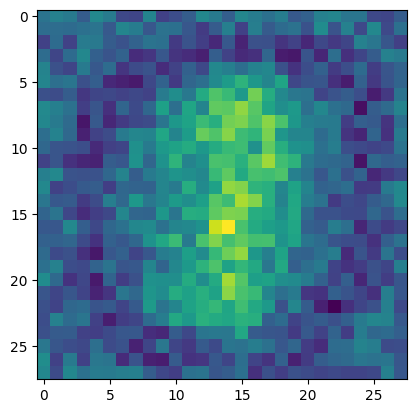

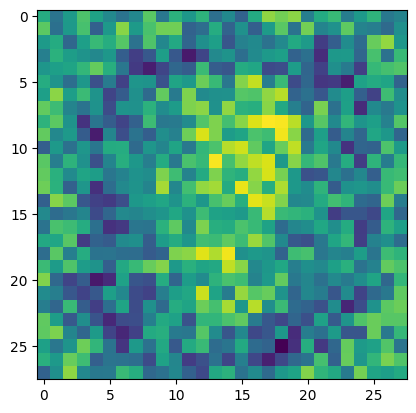

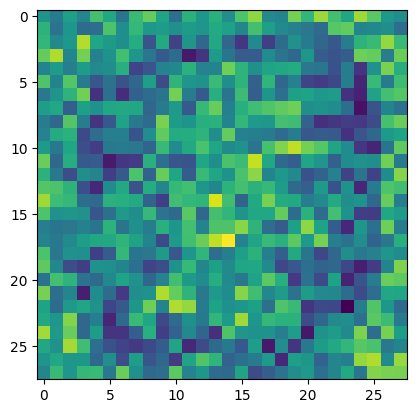

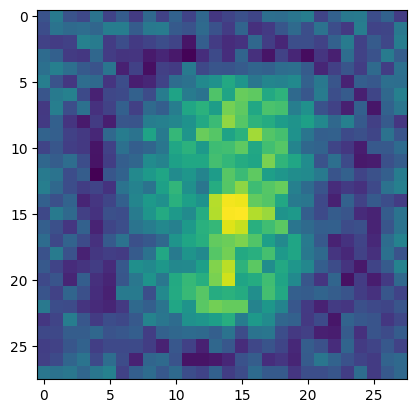

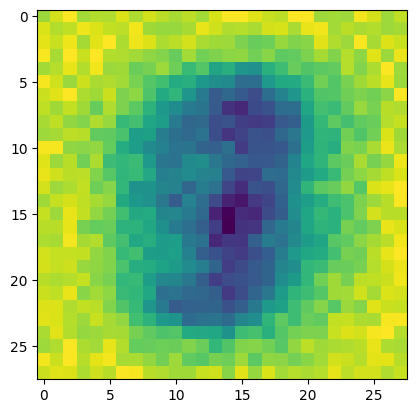

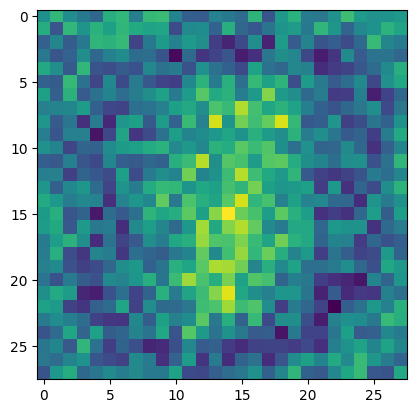

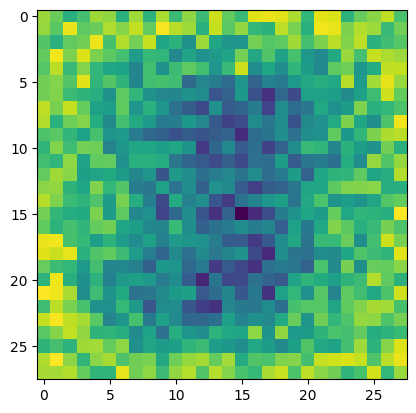

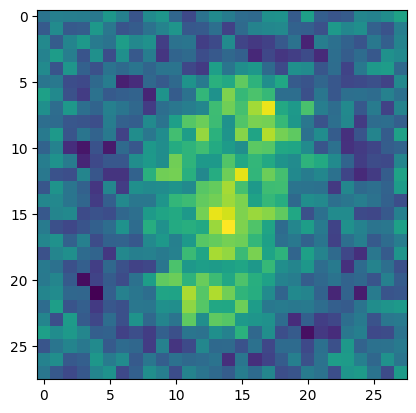

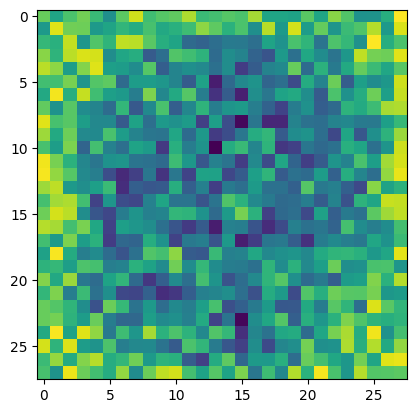

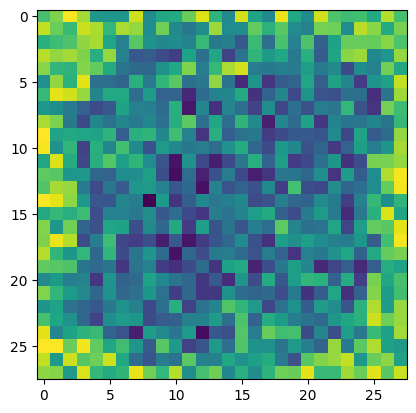

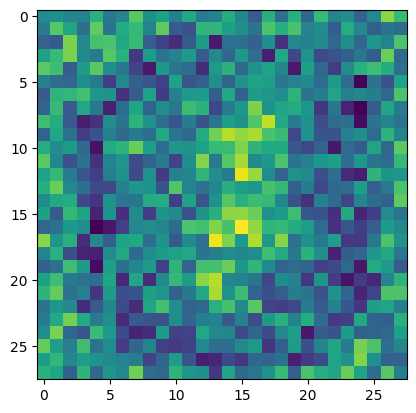

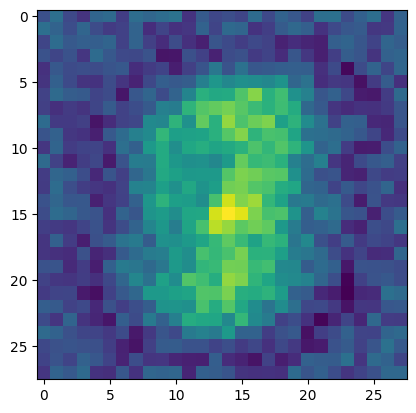

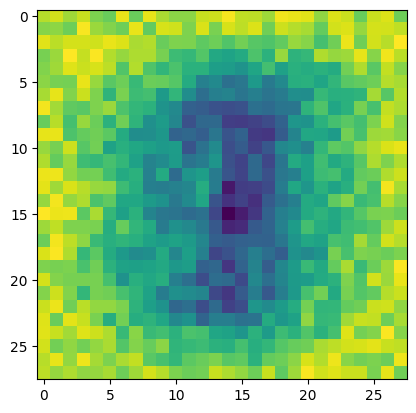

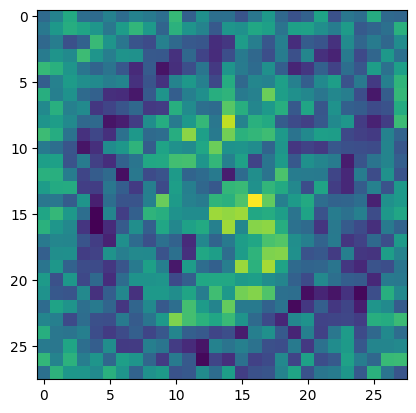

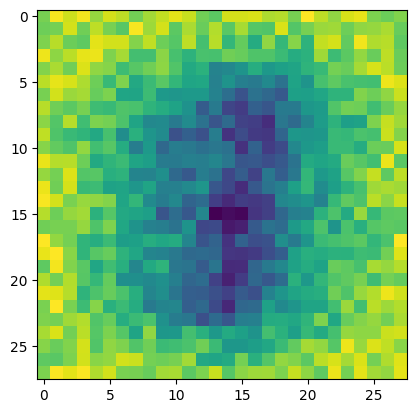

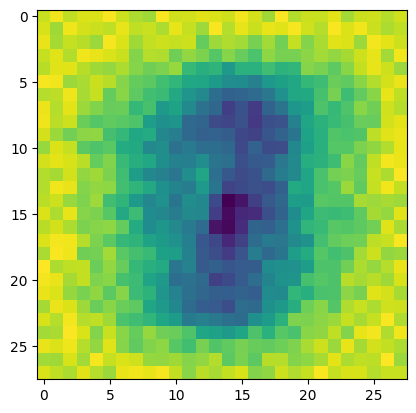

In [30]:
for i in range(16):
    plt.imshow(nn.weight1.T[i].reshape(28, 28))
    plt.show()

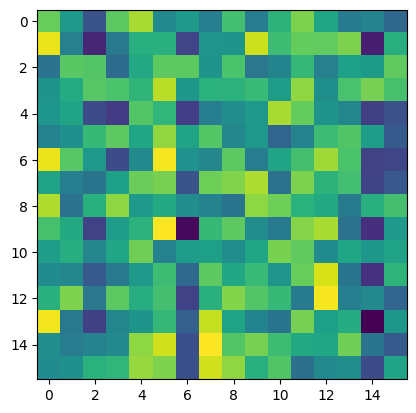

In [13]:
plt.imshow(nn.weight2)

In [14]:
result = nn.forward(inputData[1])
np.where(result == np.max(result))

(array([9]),)

In [15]:
score = 0
loseIdx = []
failureResult = []

for idx, elem in enumerate(inputData[0:60000]):
    result = nn.forward(inputData[idx])
    resultMaximum = np.where(result == np.max(result))
    labelMaximum = np.where(labelData[idx] == np.max(labelData[idx]))
    if resultMaximum == labelMaximum:
        score+=1
    else:
        loseIdx.append(idx)
        failureResult.append((idx, resultMaximum, labelMaximum))

In [16]:
print(score / 60000 * 100, "%")

9.915000000000001 %


In [17]:
testData = data[test_idx][image_idx]
testLabelData = data[test_idx][label_idx]

In [18]:
len(testData)

10000

In [19]:
score = 0
loseIdx = []
failureResult = []

for idx, elem in enumerate(testData):
    result = nn.forward(testData[idx])
    resultMaximum = np.where(result == np.max(result))
    labelMaximum = np.where(testLabelData[idx] == np.max(testLabelData[idx]))
    if resultMaximum == labelMaximum:
        score+=1
    else:
        loseIdx.append(idx)
        failureResult.append((idx, resultMaximum, labelMaximum))

In [20]:
print(score / 10000 * 100, "%")

10.09 %


In [21]:
loseIdx[0:10]

[0, 1, 2, 3, 4, 5, 6, 8, 10, 11]

(13, (array([9]),), (array([0]),))


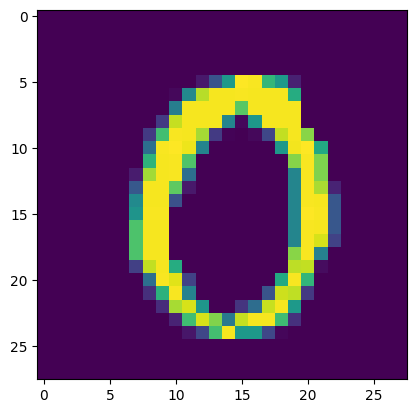

(14, (array([9]),), (array([1]),))


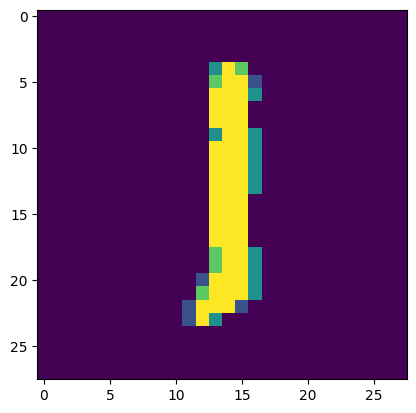

(15, (array([9]),), (array([5]),))


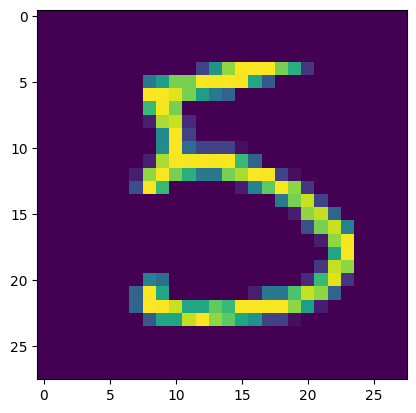

(17, (array([9]),), (array([7]),))


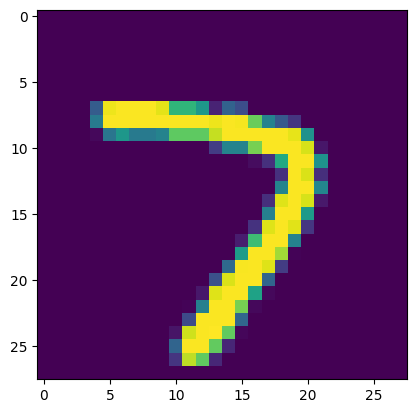

(18, (array([9]),), (array([3]),))


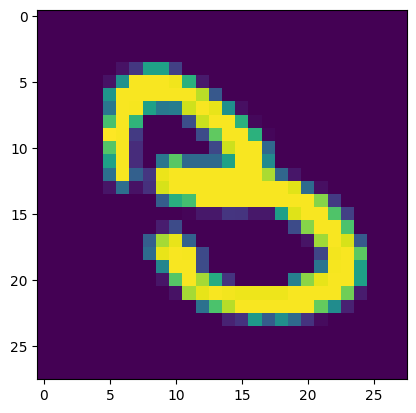

(19, (array([9]),), (array([4]),))


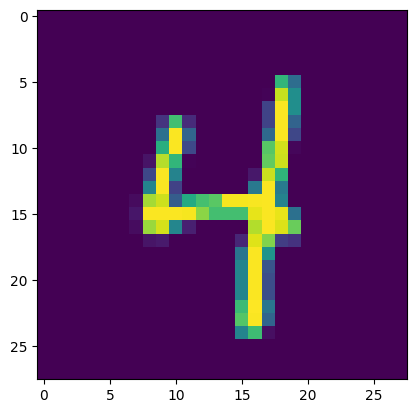

(21, (array([9]),), (array([6]),))


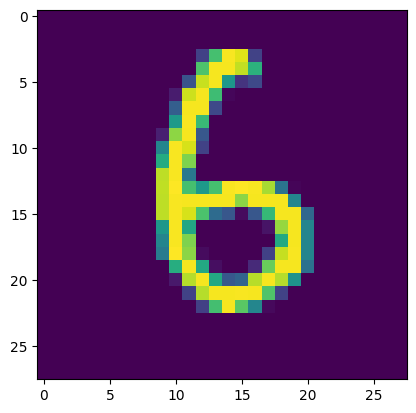

(22, (array([9]),), (array([6]),))


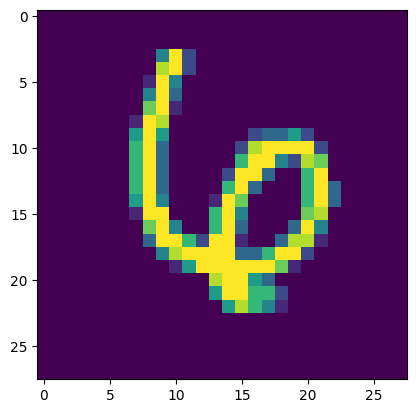

(23, (array([9]),), (array([5]),))


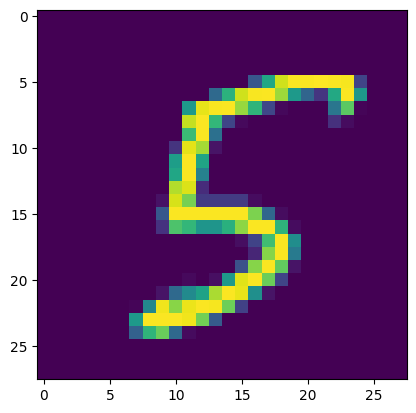

(24, (array([9]),), (array([4]),))


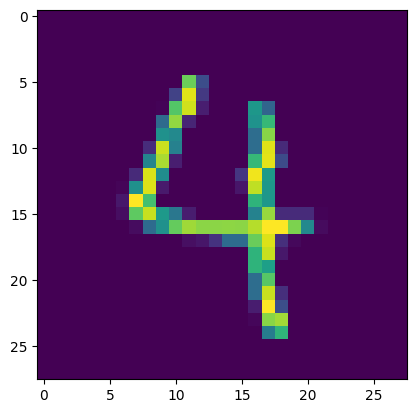

In [22]:
for i in range(10,20):
    print(failureResult[i])
    plt.imshow(testData[loseIdx[i]].reshape(28,28))
    plt.show()

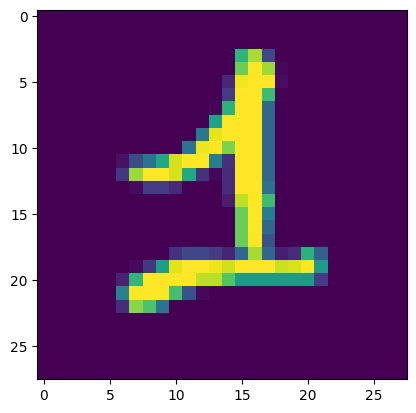

In [23]:
plt.imshow(inputData[24].reshape(28, 28))

In [24]:
failureResult[0]

(0, (array([9]),), (array([7]),))

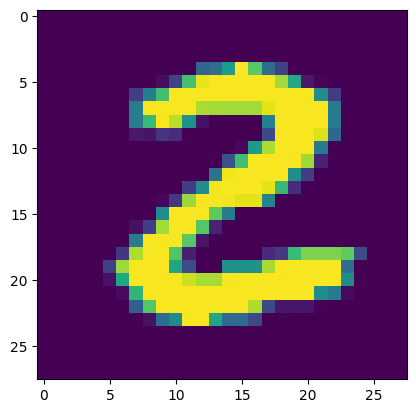

In [25]:
plt.imshow(inputData[25].reshape(28, 28))

In [26]:
failureResult[1]

(1, (array([9]),), (array([2]),))